# 3.3 Phân tích về fanpage
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## 3.3.1 Cài đặt thư viện và chuẩn bị dữ liệu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime

In [2]:
df = pd.read_csv('Data/GenshinImpact.vi_modified.csv')
df['time'] = df['time'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   post_url        123 non-null    object        
 1   post_text       123 non-null    object        
 2   time            123 non-null    datetime64[ns]
 3   image           91 non-null     object        
 4   video           12 non-null     object        
 5   comments        123 non-null    int64         
 6   shares          123 non-null    int64         
 7   user_id         123 non-null    int64         
 8   comments_full   123 non-null    object        
 9   reaction_count  123 non-null    int64         
 10  thích           123 non-null    int64         
 11  yêu thích       123 non-null    int64         
 12  haha            123 non-null    int64         
 13  wow             123 non-null    int64         
 14  thương thương   123 non-null    int64         
 15  buồn  

## 3.3.2 Tỉ lệ bài viết có hình ảnh đi kèm hoặc video đi kèm

In [4]:
image_counts = df['image'].value_counts().shape[0]
video_counts = df['video'].value_counts().shape[0]
# Labels cho các phần
labels1 = ['có hình ảnh', 'không có hình ảnh']
labels2 = ['có video' , 'không có video']

# Màu sắc cho các phần
colors = ['lightskyblue', 'red']

data1 = [image_counts, df['image'].shape[0] - image_counts]
data2 = [video_counts, df['video'].shape[0] - video_counts]

In [5]:
video_counts

12

### 3.3.2.1 Tỉ lệ bài viết có hình ảnh đi kèm

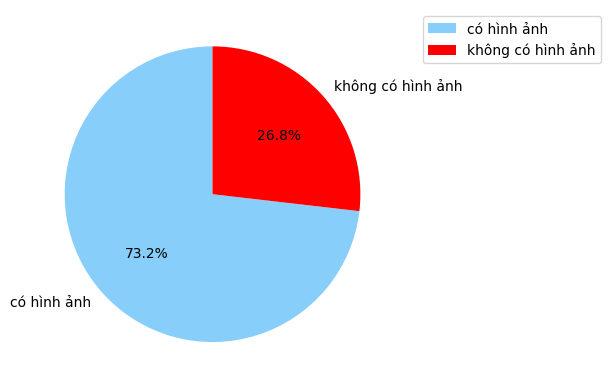

In [6]:
# Vẽ biểu đồ pie
plt.pie(data1, labels=labels1, colors=colors, autopct='%1.1f%%', startangle=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### 3.3.2.2 Tỉ lệ bài viết có video đi kèm

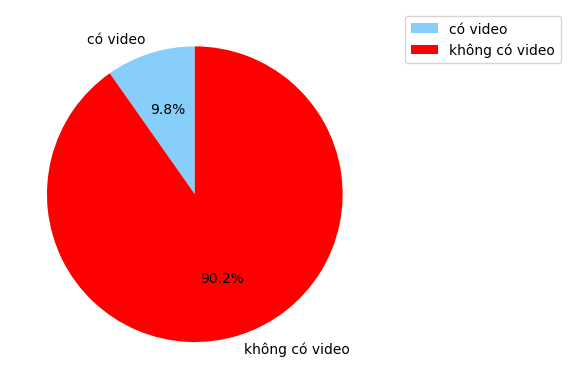

In [7]:
# Vẽ biểu đồ pie
plt.pie(data2, labels=labels2, colors=colors, autopct='%1.1f%%', startangle=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## 3.3.3 Page với thời điểm đăng bài

### 3.3.3.1 Các mốc thời gian trong ngày mà Fanpage thường xuyên đăng bài

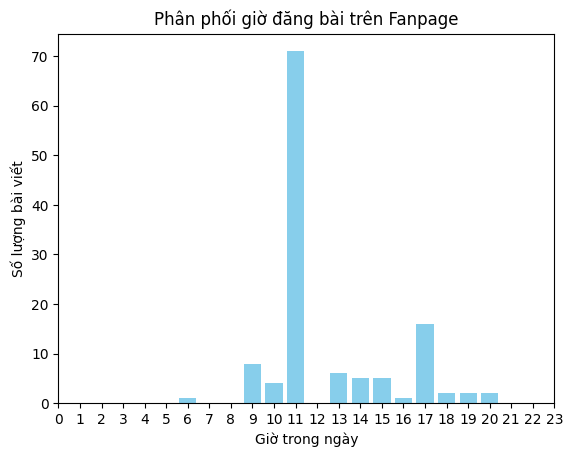

In [8]:
data = df['posted_hour'].value_counts().sort_index()

plt.bar(data.index, data.values, color='skyblue')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng bài viết')
plt.title('Phân phối giờ đăng bài trên Fanpage')
plt.xticks(range(24))  # Đảm bảo hiển thị đầy đủ 24 giờ trong ngày
plt.show()

### 3.3.3.2 Các mốc thời gian trong tuần mà Fanpage thường xuyên đăng bài

Text(0, 0.5, 'Số lượng bài viết')

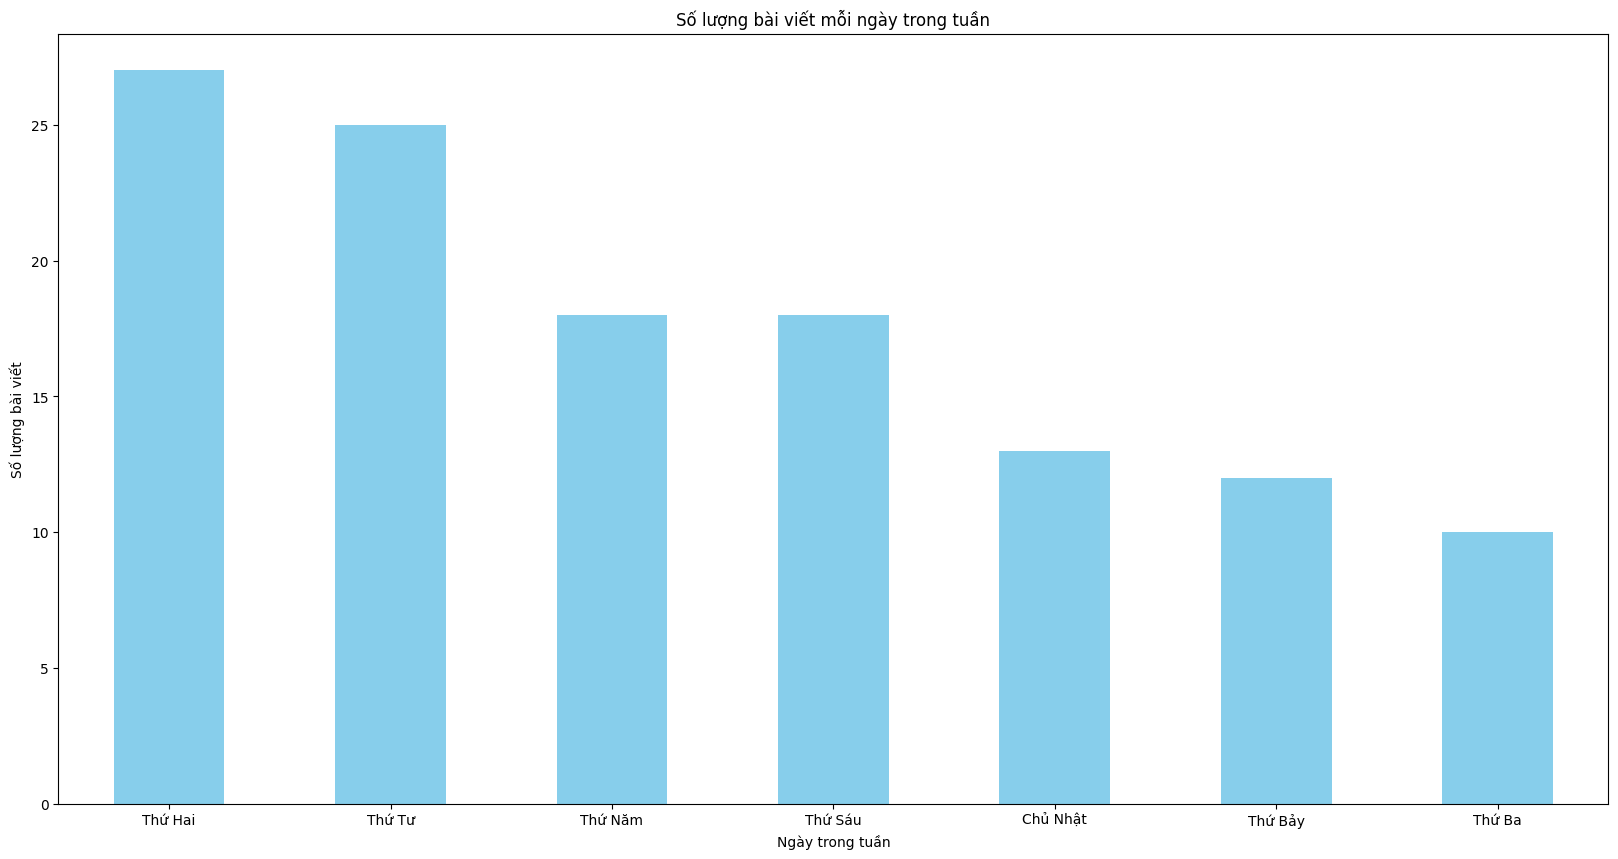

In [9]:
week_day = ['Thứ Hai', 'Thứ Ba', 'Thứ Tư', 'Thứ Năm', 'Thứ Sáu', 'Thứ Bảy', 'Chủ Nhật']
df['week_day'] = df['time'].apply(lambda x: week_day[x.weekday()])

df['week_day'].value_counts().plot(kind='bar', figsize=(20,10), color = 'skyblue')
plt.title('Số lượng bài viết mỗi ngày trong tuần')
plt.xlabel('Ngày trong tuần')
plt.xticks(rotation = 0)
plt.ylabel('Số lượng bài viết')

In [10]:
df[df['week_day'] == 'Thứ Hai'].head(10)['post_url'].values

array(['https://facebook.com/GenshinImpact.vi/posts/657678439852777',
       'https://facebook.com/GenshinImpact.vi/posts/657678039852817',
       'https://facebook.com/GenshinImpact.vi/posts/653832770237344',
       'https://facebook.com/GenshinImpact.vi/posts/653822416905046',
       'https://facebook.com/GenshinImpact.vi/posts/650114190609202',
       'https://facebook.com/GenshinImpact.vi/posts/650114193942535',
       'https://facebook.com/GenshinImpact.vi/posts/650112447276043',
       'https://facebook.com/GenshinImpact.vi/posts/650112450609376',
       'https://facebook.com/GenshinImpact.vi/posts/650012693952685',
       'https://facebook.com/GenshinImpact.vi/posts/650007230619898'],
      dtype=object)